In [ ]:
nce

# Student Performance

Dataset Overview

Dataset: Student Performance

Rows: 10,000

Target Variable: Performance Index

Type: Regression

**Problem Statement**

Predict student performance score based on study habits, previous academic history, sleep patterns, and extracurricular participation.

**Business Relevance**

This model can help:

Identify key academic performance drivers

Optimize study strategies

Improve academic planning systems

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("Student_Performance.csv")

print(df.shape)
df.head()
df.info()


(10000, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [3]:
# Feature Type Classification

target = "Performance Index"

numerical_cols = [
    "Hours Studied",
    "Previous Scores",
    "Sleep Hours",
    "Sample Question Papers Practiced"
]

categorical_cols = ["Extracurricular Activities"]


In [5]:
# Missing values and Duplicates
df.isna().sum()


,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [6]:
df.duplicated().sum()

np.int64(127)

In [7]:
df = df.drop_duplicates()

A total of 127 duplicate rows were identified in the dataset. Since duplicate records do not provide additional information and may bias model training, they were removed.

In [8]:
df.shape

(9873, 6)

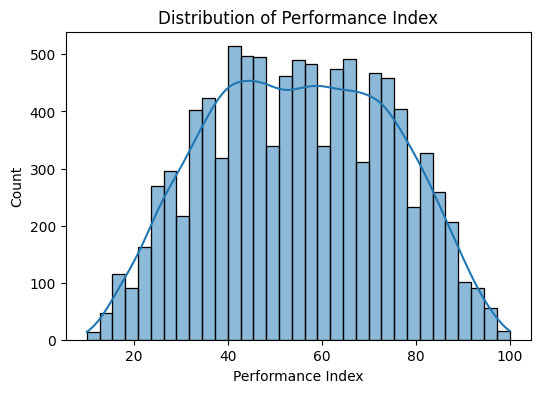

In [9]:
# Target Distribution
plt.figure(figsize=(6,4))
sns.histplot(df[target], kde=True)
plt.title("Distribution of Performance Index")
plt.show()


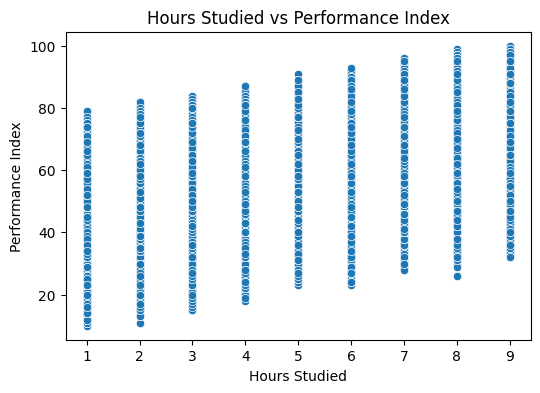

In [11]:
#Hours Studied vs Performance
plt.figure(figsize=(6,4))
sns.scatterplot(x="Hours Studied",
                y="Performance Index",
                data=df)
plt.title("Hours Studied vs Performance Index")
plt.xlabel("Hours Studied")
plt.ylabel("Performance Index")
plt.show()


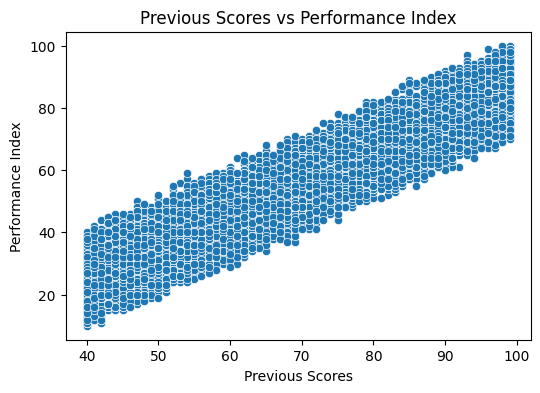

In [12]:
# Previous scores vs Performance

plt.figure(figsize=(6,4))
sns.scatterplot(x="Previous Scores",
                y="Performance Index",
                data=df)
plt.title("Previous Scores vs Performance Index")
plt.xlabel("Previous Scores")
plt.ylabel("Performance Index")
plt.show()


Hours Studied shows a strong positive linear relationship with Performance Index, indicating that increased study time is associated with higher performance. Previous Scores also demonstrate a strong correlation, suggesting academic consistency plays a significant role in predicting performance.

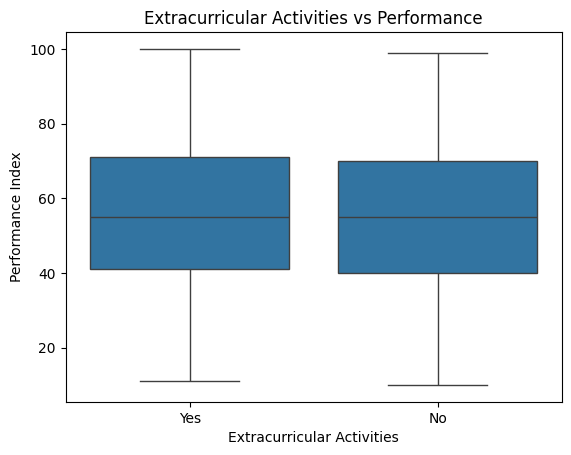

In [13]:
sns.boxplot(x="Extracurricular Activities",
            y=target, data=df)
plt.title("Extracurricular Activities vs Performance")
plt.show()


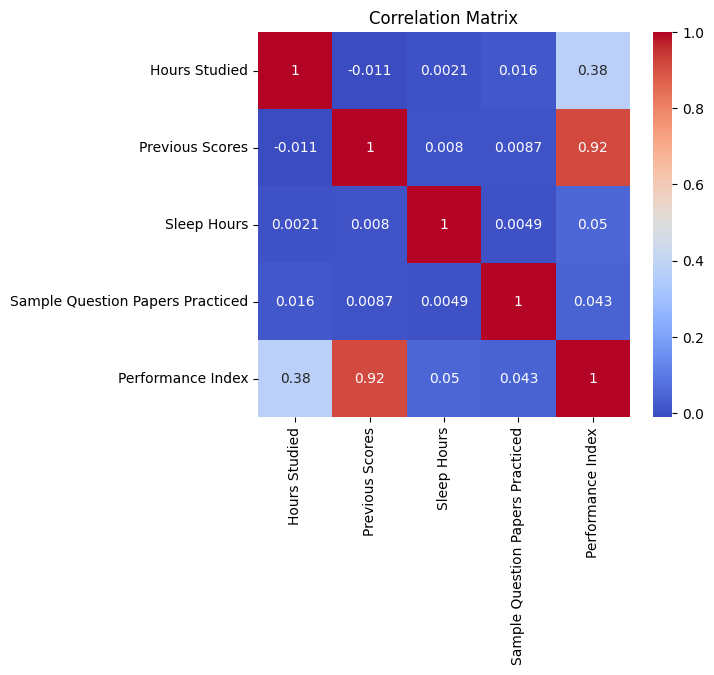

In [14]:
# Correlation Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df[numerical_cols + [target]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [15]:
# Outlier check
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(col, "outlier %:",
          round(len(outliers)/len(df)*100, 2))


Hours Studied outlier %: 0.0
Previous Scores outlier %: 0.0
Sleep Hours outlier %: 0.0
Sample Question Papers Practiced outlier %: 0.0


In [16]:
# Encoding
df["Extracurricular Activities"] = \
df["Extracurricular Activities"].map({"Yes": 1, "No": 0})


In [17]:
# train-test split
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [18]:
#F eature scaling
scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


**Key Findings**

Hours Studied strongly correlates with performance.

Previous Scores show strong predictive power.

Extracurricular participation has moderate effect.

Target appears relatively normally distributed.

**Modeling Challenges**

Limited number of features

Potential multicollinearity between study-related variables

No missing data (clean dataset)

**Feature Engineering Suggestions**

Create interaction: Hours × Previous Scores

Create Study Efficiency metric

Test nonlinear relationship for sleep hours

In [19]:
readme_content = """
# Student Performance – Data Preprocessing & Visualization
link:https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression
## Problem Statement
Predict student performance based on academic and behavioral features.

## Target Variable
Performance Index (Continuous)

## Preprocessing Summary
- Removed 127 duplicate rows.
- No missing values detected.
- Encoded Extracurricular Activities (Yes=1, No=0).
- Applied feature scaling after train-test split.

## Key Insights
- Hours Studied strongly correlates with performance.
- Previous Scores show high predictive power.
- Dataset is clean and structured.

## Next Steps
- Train regression models.
- Evaluate using RMSE and R².
- Explore interaction and nonlinear effects.
"""

with open("README.md", "w") as f:
    f.write(readme_content)

print("README.md file created successfully.")


README.md file created successfully.
